In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [2]:
# Reading data and dropping null values and duplicates
df = pd.read_csv("Iris.csv")
print("Data imported successfully!")
print("are there any null values? : {}".format(df.isnull().values.any()))
df.drop_duplicates(inplace=True)
print("Duplicates are dropped, if there were any of them.")

Data imported successfully!
are there any null values? : False
Duplicates are dropped, if there were any of them.


# Visualization

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

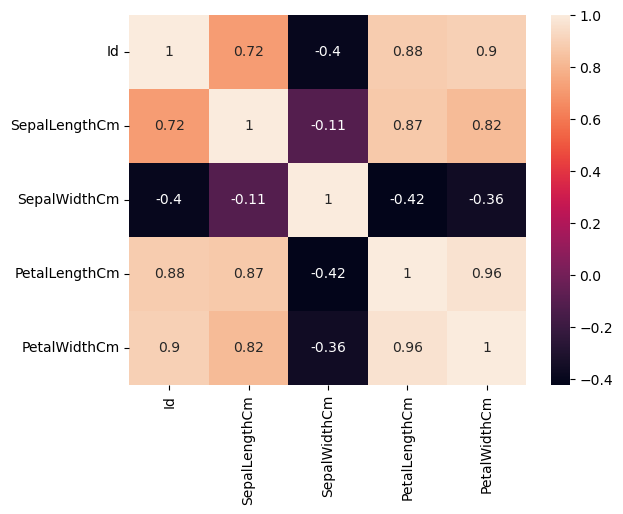

In [4]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Label Encoding
We perform label encoding for converting the categorical feature ‘Species’ into a numerical one. 

In [5]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Normality test
We will perform a test to check whether the data is normally distributed, we will use the Quantile-Quantile plot.

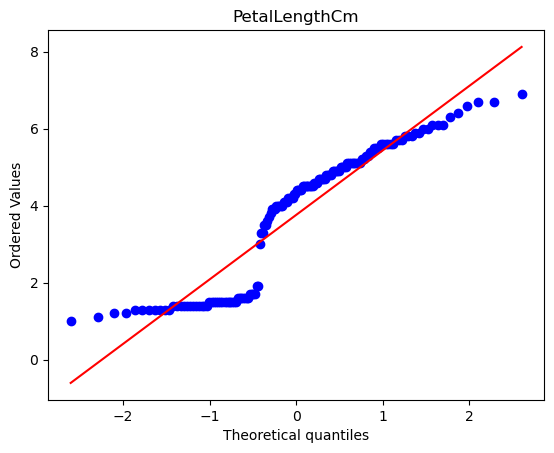

In [6]:
g = pd.DataFrame(df['PetalLengthCm']).copy()
for i in g.columns:
    probplot(x=g[i], dist='norm', plot=plt)
    plt.title(i)
    plt.show()

concluding from what we see from the graph, the dataset is not normally distributed.

we are going to use Min-Max feature scaling.

but first, we will drop the ID column because it is insignificant.

In [7]:
new_df2 = df.drop(['Id'], axis=1)
new_df2.head(101)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs), but we will not use the labels in our unsupervised learning model.

In [8]:
X = new_df2.iloc[:, [0, 1, 2, 3]].values
y_test = new_df2["Species"]

In [9]:
scaler = MinMaxScaler().fit(X)
X_norm = scaler.transform(X)

# How to find the optimum number of clusters (the value of K) for K Means?

C:\Users\anton\Anaconda3\envs\The_Sparks_Foundation\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\Anaconda3\envs\The_Sparks_Foundation\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\Anaconda3\envs\The_Sparks_Foundation\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\Anaconda3\envs\The_Sparks_Foundation\lib

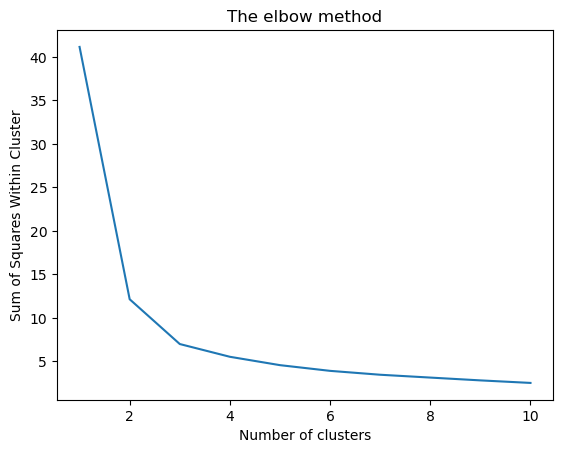

In [10]:
# Finding the optimum number of clusters for k-means classification
sswc = [] #Sum of Squares Within Cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_norm)
    sswc.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), sswc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares Within Cluster')
plt.show()

You can clearly see why it is called "The elbow method" from the above graph, the optimum clusters is where the elbow occurs.This is when the sum of squares within cluster (SSWC) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as "3"

C:\Users\anton\Anaconda3\envs\The_Sparks_Foundation\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


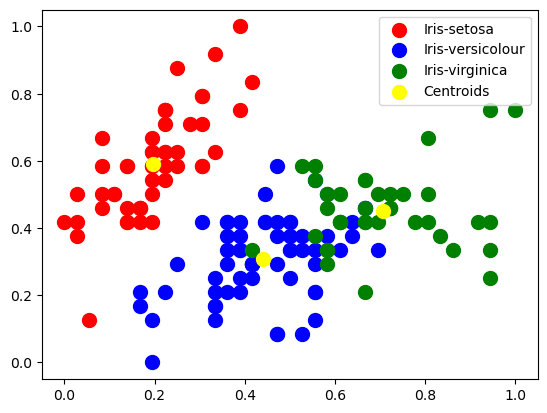

In [11]:
# Creating the K-means classifier and applying it to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(X_norm)

# Visualising the clusters - On the first two columns
plt.scatter(X_norm[y_pred == 0, 0], X_norm[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_norm[y_pred == 1, 0], X_norm[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_norm[y_pred == 2, 0], X_norm[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Results
Now, we analyze our models and generate the result.

In [12]:
#KMeans model accuracy
print(accuracy_score(y_test, y_pred)*100)

88.66666666666667
